# Setup

## Imports

In [2]:
# Basic Libraries
import warnings
import pandas as pd
import numpy as np

# EDA
import sweetviz as sv
from skimpy import skim, clean_columns
from klib import convert_datatypes
from klib import describe
from dython import nominal

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Configurations and Functions

In [3]:
# Defining plot standard parameters
plt.rcParams.update({
    "axes.labelcolor": "#595959",
    "axes.facecolor": (0, 0, 0, 0),
    "axes.grid": False,
    "axes.labelpad": 6,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "figure.figsize": (9.25, 2.5),
    "figure.facecolor": (0, 0, 0, 0),
    "figure.dpi": 100,
    "legend.edgecolor": "#D9D9D9",
    "legend.borderaxespad": 0,
    "legend.framealpha": None,
    "legend.fontsize": 8,
    "legend.loc": "upper right",
    "legend.title_fontsize": 9,
    "text.color": "#595959",
    "xtick.color": "#D9D9D9",
    "xtick.labelcolor": "#595959",
    "ytick.color": "#D9D9D9",
    "ytick.labelcolor": "#595959"
})

In [4]:
def plot_bar_over_time(df_for_plot, col, ylabel, dpi=200, format_as_currency=False):
    # Creating Figure
    fig, ax = plt.subplots(dpi=dpi)
    # Plotting Axes
    ax.bar(x=df_for_plot.index, height=col, data=df_for_plot, width=20)  # Adjust the width parameter as needed
    # Setting Ticks
    fig.autofmt_xdate(rotation=0, ha="center")  # Auto format date labels
    # Labeling
    ax.set_ylabel(ylabel=ylabel, loc="top")
    for container in ax.containers:
        if format_as_currency:
            labels = [f"{bar.get_height()/1000:.0f}k" if bar.get_height() >= 1000 else f"{bar.get_height():.1f}" for bar in container]
        else:
            labels = [f"{bar.get_height():.0f}" for bar in container]
        ax.bar_label(container, labels=labels, label_type="edge", color="#1f77b4", size=6)
    # Setting Labels Aesthetics
    ax.spines["bottom"].set_color("#D9D9D9")
    ax.spines["left"].set_color("#D9D9D9")

    return ax

In [5]:
def plot_distribution(data, xlabel, dpi=200, option="right"):
    with sns.plotting_context(rc={
        "axes.facecolor":(0,0,0,0), 
        "figure.facecolor":(0,0,0,0), 
        "figure.dpi": dpi
    }):
        # Getting Stats
        mean = data.mean().item()
        std = data.std().item()
        median = data.median().item()
        skew = data.skew().item()
        kurtosis = data.kurtosis().item()
        # Setting Parameters
        rug_kws = ({"color": "#ff3333", "alpha": 0.15, "lw": 3, "height": 0.1})
        kde_kws = ({"alpha": 0.75, "linewidth": 1.5, "bw_adjust": 1.5})  # Increased bw_adjust to 1.5
        # Creating FacetGrid
        grid = sns.displot(
            data,
            kind="kde",
            rug=True,
            legend=False,
            height=2.5,
            aspect=3.7,
            rug_kws=rug_kws,
            **kde_kws,
        );
        # Filling quantile range
        x, y = grid.ax.lines[0].get_xydata().T
        grid.ax.fill_between(
            x,
            y,
            where=(
                (x >= np.quantile(data, 0.025))
                & (x <= np.quantile(data, 0.975))
            ),
            label=f"{0.025*100:.1f}% - {0.975*100:.1f}%",
            color="#80d4ff",
            alpha=0.2
        )
        # Creating Lines
        grid.ax.vlines(
            x=mean,
            ymin=0,
            ymax=np.interp(mean, x, y),
            ls="dotted",
            color="orange",
            lw=2,
            label="média",
        )
        grid.ax.vlines(
            x=median,
            ymin=0,
            ymax=np.interp(median, x, y),
            ls=":",
            color=".3",
            label="mediana",
        )
        grid.ax.vlines(
            x=[mean - std, mean + std],
            ymin=0,
            ymax=[np.interp(mean - std, x, y), np.interp(mean + std, x, y)],
            ls=":",
            color=".5",
            label="\u03BC \u00B1 \u03C3",
        )

        # Positioning plot on customized limits
        grid.ax.set_ylim(0)
        grid.ax.set_xlim(
            grid.ax.get_xlim()[0] - grid.ax.get_xlim()[1] * 0.05, grid.ax.get_xlim()[1] * 1.03,
        )
        # Annotations and legend
        if option == "left":
            grid.ax.text(0.01, 0.8, f"Mediana: {median:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.01, 0.9, f"Média: {mean:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.01, 0.7, f"Desvio padrão: {std:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.01, 0.6, f"Assimetria: {skew:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.01, 0.5, f"Curtose: {kurtosis:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.01, 0.4, f"Registros: {len(data)}",  transform=grid.ax.transAxes,)
        elif option == "right":
            grid.ax.text(0.65, 0.8, f"Mediana: {median:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.65, 0.9, f"Média: {mean:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.65, 0.7, f"Desvio padrão: {std:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.65, 0.6, f"Assimetria: {skew:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.65, 0.5, f"Curtose: {kurtosis:.2f}", transform=grid.ax.transAxes,)
            grid.ax.text(0.65, 0.4, f"Registros: {len(data)}",  transform=grid.ax.transAxes,)
        # Setting Labels Aesthetics
        grid.ax.legend(loc="upper right", fontsize=9)
        grid.despine(left=True)
        grid.ax.spines["bottom"].set_color("#D9D9D9")
        grid.ax.set_ylabel(None)
        grid.ax.get_yaxis().set_visible(False)
        grid.ax.set_xlabel(xlabel)

        return grid

# Ingesting Data

In [6]:
# List of report files
reports = [
    "Report 1.csv",
    "Report 2.csv",
    "Report 3.csv",
    "Report 4.csv",
    "Report 5.csv",
]

# Initialize an empty list to store dataframes
df_list = []

for report in reports:
    # Ingesting Data
    df_temp = (
        clean_columns(
            df=convert_datatypes(
                data=(
                    pd.read_csv(
                        filepath_or_buffer=f"../data/raw/{report}",
                        usecols=(
                            "Order",
                            "Creation Date",
                            "Total Value",
                            "Client Hash",
                        ),
                        parse_dates=["Creation Date"],
                    )
                ),
                cat_threshold=0.5
            )
            .dropna(subset="Client Hash"),
            case="snake"
        )
    )
    # Append the dataframe to the list
    df_list.append(df_temp)

# Concatenate all dataframes
df = pd.concat(df_list, ignore_index=True)

# Saving concatenated data to processed folder
df.to_csv(path_or_buf="../data/processed/report.csv", index=False)

# Overall Reports

In [7]:
# Sweetviz
with warnings.catch_warnings():  # Ignoring pandas future warnings of SweetViz
    warnings.filterwarnings("ignore")
    sv_eda_report = sv.analyze(source=df)
sv_eda_report.show_html(filepath="../resources/report.html", layout="vertical")

                                             |          | [  0%]   00:00 -> (? left)

Report ../resources/report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
# Skimpy
skim(df.drop(columns="creation_date"))

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 129256 │ │ string      │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean     ┃ sd      ┃ p0   ┃ p25     ┃ p50     ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ total_value      │    0 │      0 │    326.4 │   300.1 │    0 │   162.1 │   249.7 │   407 │  6676 │    ▇    │  │
│ └──────────────────┴──────┴────────┴──────────┴─────────┴──────┴─────────┴─────────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ order                     │       0 │          0 │                            1 │                   129256 │  │
│ │ client_hash               │       0 │          0 │                            1 │                   129256 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Exploration

In [9]:
min_date = df["creation_date"].min()
max_date = df["creation_date"].max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

Minimum date: 2023-01-02 00:32:47+00:00
Maximum date: 2024-11-11 10:29:20+00:00


## Order Centric

In [10]:
df_agg_by_order = df.groupby("order").agg({
    "creation_date": "first",
    "total_value": "first",
    "client_hash": "first",
    "order": "size"
}).rename(columns={"order": "distinct_itens"}).reset_index()

display(df_agg_by_order)

,order,creation_date,total_value,client_hash,distinct_itens
0,1300281217232-01,2023-01-02 00:32:47+00:00,139.449997,bfd96e74704094f6b5d8a92b809831f4a529eef8d89285...,1
1,1300281217234-01,2023-01-02 00:35:59+00:00,186.949997,538f64627ed9baeb6c5284b87969fda6181f0d0839f939...,1
2,1300281217238-01,2023-01-02 01:12:20+00:00,125.000000,891f2ad51f7cb31fdadbe3b8791e1594d0591b025f8b57...,1
3,1300301217240-01,2023-01-02 02:52:22+00:00,48.180000,0a087fb89eee1a01475e1bee723ce164ede802f3c76dd4...,1
4,1300301217242-01,2023-01-02 03:18:09+00:00,1080.000000,873877e3e2bb6db7a472b5d7dfa570bacc24d507dabfe4...,8
...,...,...,...,...,...
61638,1475731372100-01,2024-11-11 09:56:04+00:00,192.470001,78c04d377cf3683f88747cd82814ae80808f867b2281cc...,1
61639,1475731372102-01,2024-11-11 10:03:50+00:00,113.849998,9cea2d17f05318cea42a4bc6c69951e2a9a9db7c21f1f3...,1
61640,1475731372104-01,2024-11-11 10:21:45+00:00,187.360001,6fa0d6cb6abe647c38baf253ed6638c8b85cb2cfaf0b65...,1
61641,1475731372106-01,2024-11-11 10:28:59+00:00,126.000000,5c081390aae7c2c2b6982a4cbdc972cb283b0d1252cd82...,1


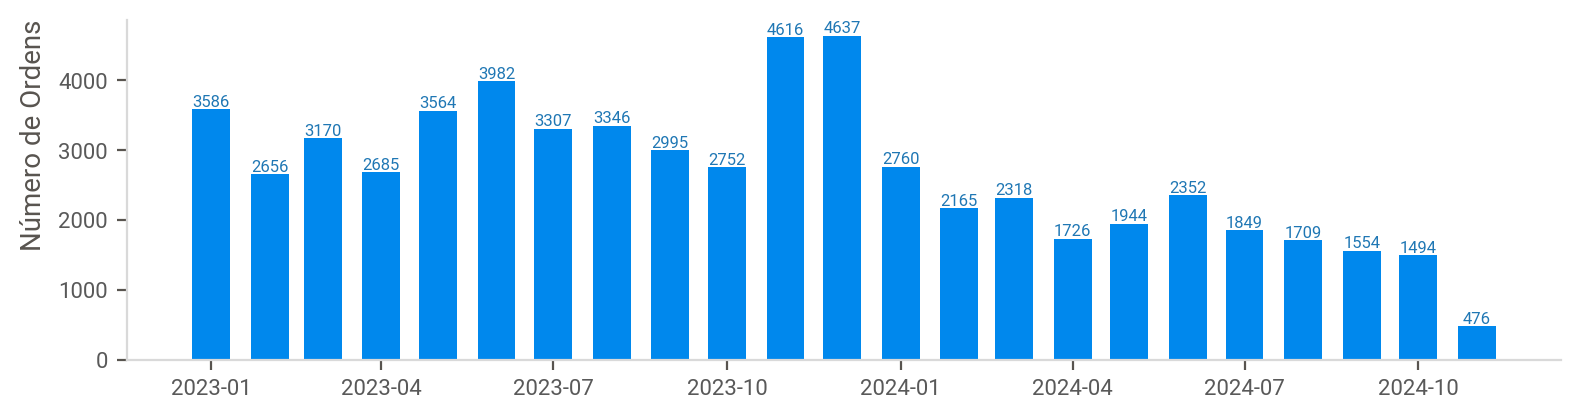

In [11]:
df_for_plot = (
    df_agg_by_order[["creation_date", "order"]]
    .set_index("creation_date")
    .sort_index()
    .resample("MS")
    .count()
)

plot_bar_over_time(
    df_for_plot=df_for_plot, 
    col="order", 
    ylabel="Número de Ordens",
    format_as_currency=False,
);


- Tendência de Pedidos: O número de pedidos tem diminuído ao longo do tempo.
- Sazonalidade: black friday e fim de ano destoam do restante do período. Junho também, devido ao dia dos namorados.

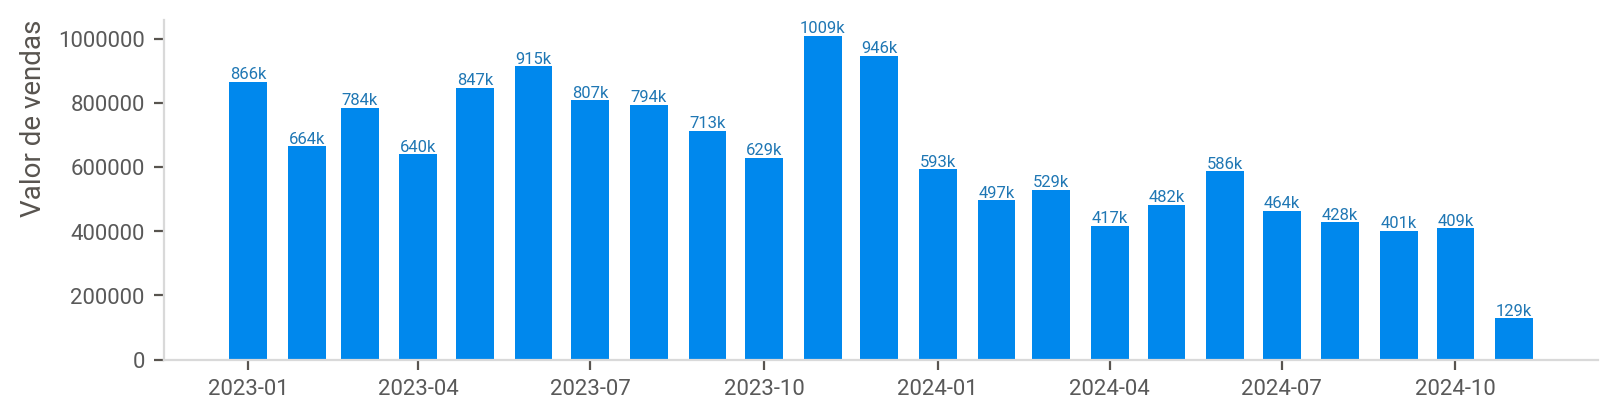

In [12]:
df_for_plot = (
    df_agg_by_order[["creation_date", "total_value"]]
    .set_index("creation_date")
    .sort_index()
    .resample("MS")
    .sum()
)

plot_bar_over_time(
    df_for_plot=df_for_plot, 
    col="total_value", 
    ylabel="Valor de vendas",
    format_as_currency=True,
);

Tendência de Vendas: O valor total das vendas também diminuiu ao longo do período.

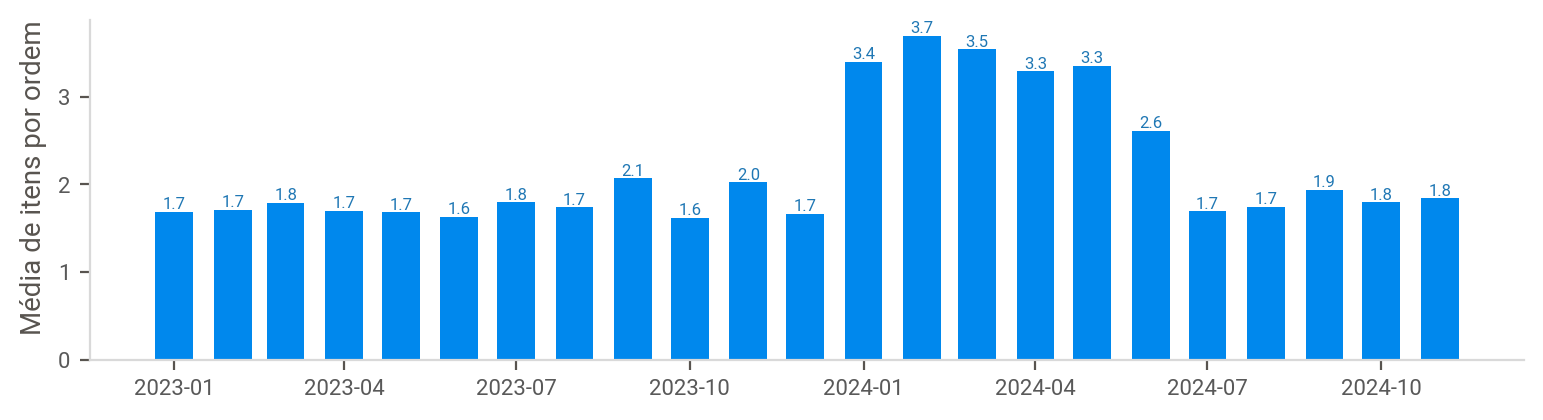

In [13]:
df_for_plot = (
    df_agg_by_order[["creation_date", "distinct_itens"]]
    .set_index("creation_date")
    .sort_index()
    .resample("MS")
    .mean()
)

plot_bar_over_time(
    df_for_plot=df_for_plot, 
    col="distinct_itens", 
    ylabel="Média de itens por ordem",
    format_as_currency=True,
);

- Tendência de pedidos por ordem: houve um aumento significativo em 2024, mas retornou à média em Julho. É interessante investigar com o negócio se esse comportamento foi notado.
- Composição do Pedido: É bastante comum que os pedidos tenham mais de um item (a média é de dois), apresentando potencial para explorar sistemas de recomendação no negócio.

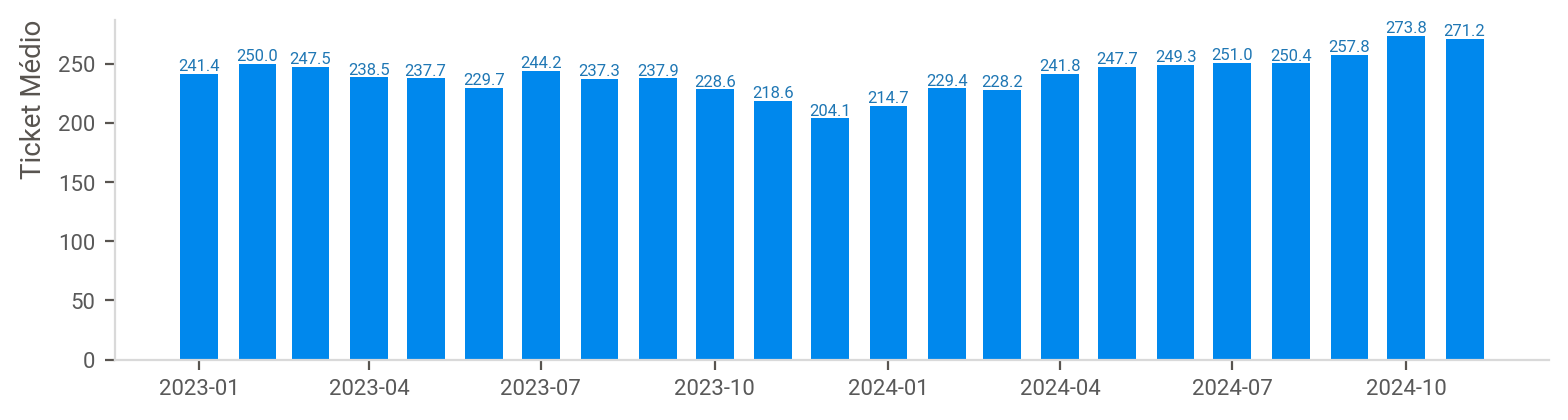

In [14]:
df_for_plot = (
    df_agg_by_order[["creation_date", "total_value"]]
    .set_index("creation_date")
    .sort_index()
    .resample("MS")
    .mean()
)

plot_bar_over_time(
    df_for_plot=df_for_plot, 
    col="total_value", 
    ylabel="Ticket Médio",
    format_as_currency=True,
);

Valor Médio do Ticket: O valor médio do ticket aumentou, indicando uma mudança no perfil de compra.

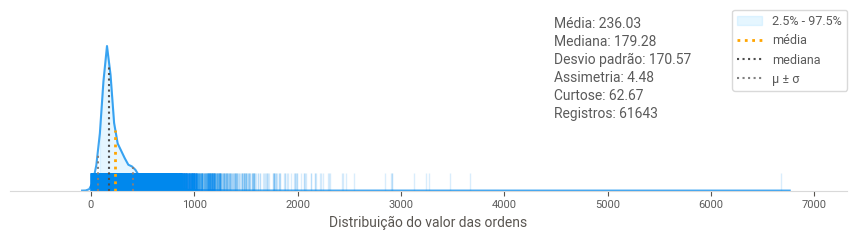

In [15]:
df_for_plot = df_agg_by_order["total_value"]

plot_distribution(
    data=df_for_plot, 
    xlabel="Distribuição do valor das ordens",
);

Valores das ordens: a média de um pedido é de R$ 236.03, com alto desvio padrão (R$ 170.57). A média é bastante afetada pela distribuição de cauda longa com Skewness positivo.

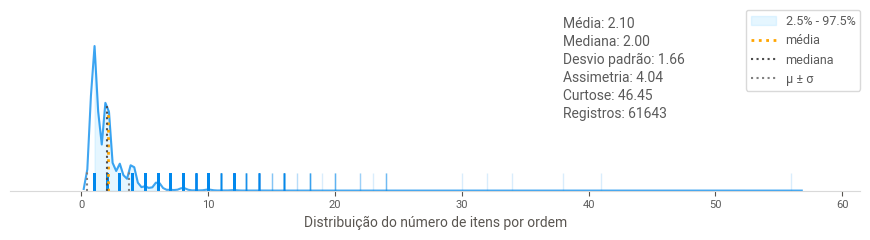

In [16]:
df_for_plot = df_agg_by_order["distinct_itens"]

plot_distribution(
    data=df_for_plot, 
    xlabel="Distribuição do número de itens por ordem",
);

Número de itens: a média de um pedido é de 2.1, com alto desvio padrão (1.6). A distribuição tem o mesmo perfil dos valores das ordens

## User Centric

In [17]:
df_agg_by_user = (
    df_agg_by_order
    .groupby(
        by="client_hash",
        observed=True,
    )
    .agg(
        recency=pd.NamedAgg(column="creation_date", aggfunc=lambda x: (pd.Timestamp("2024-11-11", tz="America/Sao_Paulo") - x.max()).days),
        frequency=pd.NamedAgg(column="order", aggfunc="count"),
        monetary=pd.NamedAgg(column="total_value", aggfunc="sum")
    )
    .reset_index()
    .assign(
        # Making sure we do not have negative or zero values
        recency=lambda x: np.where(x["recency"] > 0, x["recency"], 1),
        frequency=lambda x: np.where(x["frequency"] > 0, x["frequency"], 1),
        monetary=lambda x: np.where(x["monetary"] > 0, x["monetary"], 1),
    )
)
display(df_agg_by_user)

,client_hash,recency,frequency,monetary
0,0002a829ad89238ec96d22d7666c09f86fc8e209d55f2c...,194,1,148.190002
1,00040249691338dfd0ed04477561b3553d23eb6f446344...,277,1,119.970001
2,0004083d471868acd94861e331312ebdf505578ec600b6...,472,1,167.949997
3,00043d712019889689b32f039ddcfe749ba14fa5b1ad2c...,525,1,173.550003
4,0006494d8bb2603742881a0d9e50aee30619d3221c3532...,156,1,191.910004
...,...,...,...,...
45885,fff554777df092cfa6309a3ddba1447413e1f0deb50b6c...,462,1,255.679993
45886,fff8e0d837f1204bd90aba64facef55b5516a8d33f3e8d...,24,1,189.220001
45887,fffaa5762ce4b80d73a54f1b5a4df0b88c3c41dda4bf38...,572,1,197.039993
45888,fffc161aab8993d2eb4f05e113c31628acecacb720fcc1...,496,1,303.910004


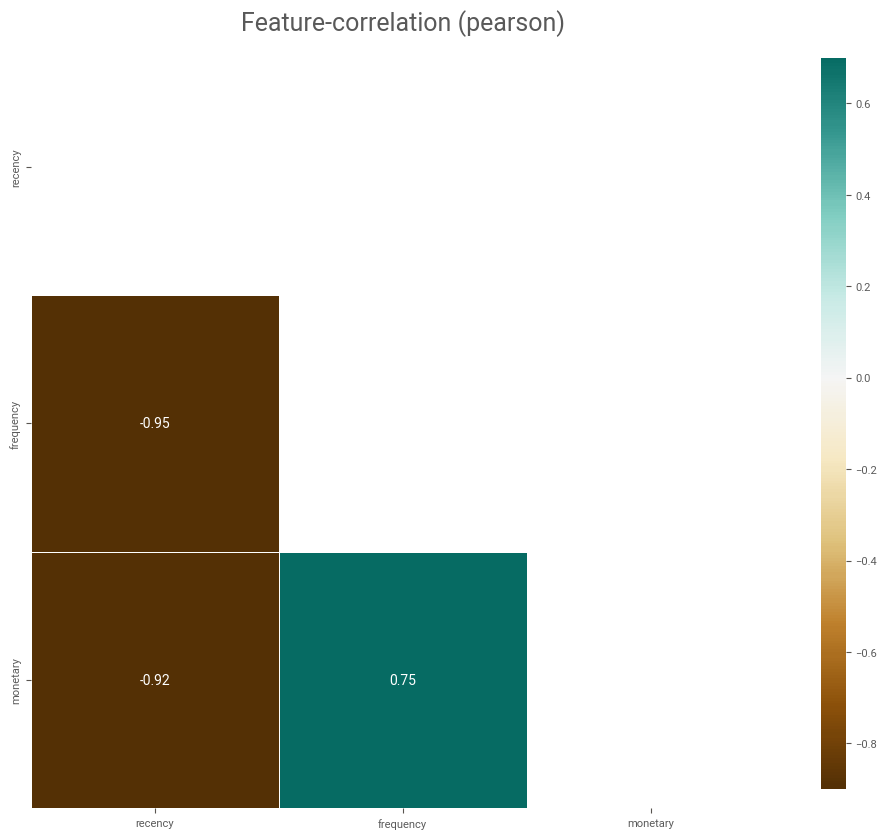

In [18]:
describe.corr_plot(
    data=nominal.associations(
        dataset=df_agg_by_user.drop(columns="client_hash"),
        numerical_columns=[
            "recency",
            "frequency",
            "monetary"
        ],
        nom_nom_assoc="cramer",
        num_num_assoc="spearman",
        nom_num_assoc="correlation_ratio",
        nan_strategy="replace",
        nan_replace_value="null",
        cramers_v_bias_correction=False,
        compute_only=True
    )["corr"]
);

- O valor que um cliente gasta é correlacionado com a frequência com que ele compre (o que é bastante óbvio).
- A recência é altamente correlacionada negativamente com o valor gasto pelo cliente (corroborando com a mudança no perfil de ticket médio) e frequência (também óbio).

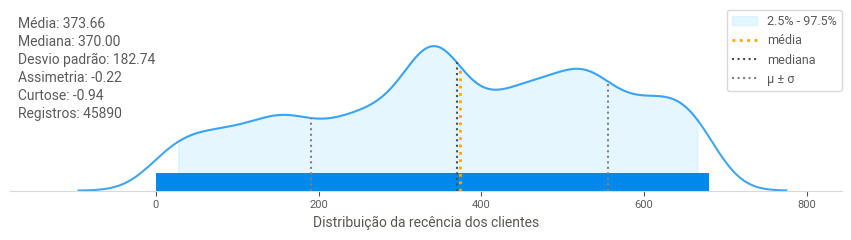

In [19]:
df_for_plot = df_agg_by_user["recency"]

plot_distribution(
    data=df_for_plot, 
    xlabel="Distribuição da recência dos clientes",
    option="left",
);

A recência das compras está bem distribuída, centrada em torno de 372 dias (cerca de um ano). Mas há uma concentração também em torno de 600 dias, o que significa que há um grande número de clientes que não compraram mais de uma vez.

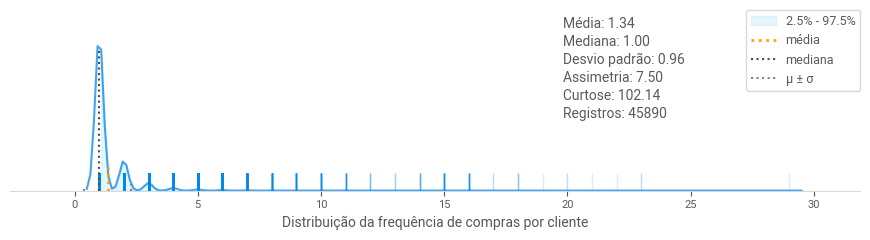

In [20]:
df_for_plot = df_agg_by_user["frequency"]

plot_distribution(
    data=df_for_plot, 
    xlabel="Distribuição da frequência de compras por cliente",
);

Frequência de Compras: A frequência geral de compras dos clientes é baixa (mediana = 1 e média = 1). Isso corrobora com os insights da distribuição de recência.

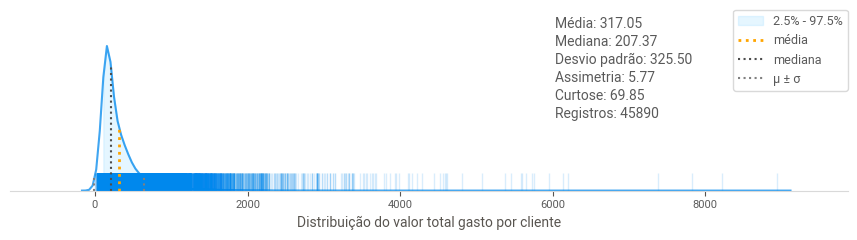

In [21]:
df_for_plot = df_agg_by_user["monetary"]

plot_distribution(
    data=df_for_plot, 
    xlabel="Distribuição do valor total gasto por cliente",
);

- Distribuição de Gastos: A distribuição de gastos por cliente é mais variada e mostra um alto desvio padrão em comparação com a média (desvio padrão = 325 e média = 317). O formato da distribuição e a mediana sendo 217 indicam um cenário em que muitos clientes gastam pouco e alguns clientes têm um gasto alto.
- Base de Clientes: Existem 45.890 clientes distintos para 61.643 pedidos no período, corroborando a baixa frequência de compras.

# Insights

*Português-BR*

## Centrado no Pedido
- Tendência de Pedidos: O número de pedidos tem diminuído ao longo do tempo.
- Sazonalidade: black friday e fim de ano destoam do restante do período. Junho também, devido ao dia dos namorados.
- Tendência de Vendas: O valor total das vendas também diminuiu ao longo do período.
- Valor Médio do Ticket: O valor médio do ticket aumentou, indicando uma mudança no perfil de compra.
- Tendência de pedidos por ordem: houve um aumento significativo em 2024, mas retornou à média em Julho. É interessante investigar com o negócio se esse comportamento foi notado.
- Composição do Pedido: É bastante comum que os pedidos tenham mais de um item (a média é de dois), apresentando potencial para explorar sistemas de recomendação no negócio.
- Valores das ordens: a média de um pedido é de R$ 236.03, com alto desvio padrão (R$ 170.57). A média é bastante afetada pela distribuição de cauda longa com Skewness positivo.
- Número de itens: a média de um pedido é de 2.1, com alto desvio padrão (1.6). A distribuição tem o mesmo perfil dos valores das ordens.

## Centrado no Usuário
- Correlações: o valor que um cliente gasta é correlacionado com a frequência com que ele compre (o que é bastante óbvio).
- Correlações: a recência é altamente correlacionada negativamente com o valor gasto pelo cliente (corroborando com a mudança no perfil de ticket médio) e frequência (também óbio).
- Distribuição da Recência: A recência das compras está bem distribuída, centrada em torno de 372 dias (cerca de um ano). Mas há uma concentração também em torno de 600 dias, o que significa que há um grande número de clientes que não compraram mais de uma vez.
- Frequência de Compras: A frequência geral de compras dos clientes é baixa (mediana = 1 e média = 1). Isso corrobora com os insights da distribuição de recência.
- Distribuição de Gastos: A distribuição de gastos por cliente é mais variada e mostra um alto desvio padrão em comparação com a média (desvio padrão = 325 e média = 317). O formato da distribuição e a mediana sendo 217 indicam um cenário em que muitos clientes gastam pouco e alguns clientes têm um gasto alto.
- Base de Clientes: Existem 45.890 clientes distintos para 61.643 pedidos no período, corroborando a baixa frequência de compras.

## Geral
- Período de Observação: o negócio é altamente impactado pela sazonalidade do ano, mas há sinais de uma mudança de perfil ao longo do tempo: há menos vendas com um ticket médio mais alto.
- Dimensão da Recência: A dimensão da recência é a mais negativamente impactada para uma boa delimitação de segmentação, pois está mais concentrada em torno de 1.
- Forma da Distribuição: Quase todas as distribuições estão próximas de uma forma normal com uma cauda longa e assimetria positiva.
- Abordagem de Outliers: Com uma base de clientes relativamente pequena, vale a pena abordar outliers mais diretamente (como clientes que fizeram mais de 5 compras e/ou gastaram R$ 1.000,00). A correlação do cliente com o valor total também aponta para isso.

*English*

## Order-Centered  
- Order Trend: The number of orders has decreased over time.  
- Seasonality: Black Friday and year-end stand out from the rest of the period. June also shows a spike due to Valentine’s Day.  
- Sales Trend: The total sales value has also decreased over the period.  
- Average Ticket Value: The average ticket value has increased, indicating a shift in purchasing behavior.  
- Order Volume Trend: There was a significant increase in orders in 2024, but it returned to average levels by July. It would be interesting to investigate with the business whether this behavior was noticed.  
- Order Composition: It is quite common for orders to have more than one item (average is two), presenting potential for exploring recommendation systems in the business.  
- Order Values: The average order value is R$ 236.03, with a high standard deviation (R$ 170.57). The average is heavily influenced by a long-tail distribution with positive skewness.  
- Number of Items: The average number of items per order is 2.1, with a high standard deviation (1.6). The distribution has the same profile as order values.  

## User-Centered  
- Correlations: The amount a customer spends correlates with how frequently they purchase (which is quite obvious).  
- Correlations: Recency is highly negatively correlated with the amount spent by the customer (confirming the shift in average ticket profile) and frequency (also obvious).  
- Recency Distribution: Purchase recency is well distributed, centered around 372 days (about one year). However, there is also a concentration around 600 days, indicating a large number of customers who have not made repeat purchases.  
- Purchase Frequency: The overall purchase frequency of customers is low (median = 1, mean = 1). This aligns with the insights from the recency distribution.  
- Spending Distribution: The spending distribution per customer is more varied, showing a high standard deviation compared to the mean (standard deviation = 325, mean = 317). The shape of the distribution and the median of 217 indicate a scenario where many customers spend little, and a few customers spend a lot.  
- Customer Base: There are 45,890 distinct customers for 61,643 orders during the period, supporting the observation of low purchase frequency.  

## General  
- Observation Period: The business is heavily impacted by yearly seasonality, but there are signs of a shift over time: fewer sales with a higher average ticket value.  
- Recency Dimension: The recency dimension is the most negatively impacted for segmentation purposes, as it is highly concentrated around 1.  
- Distribution Shape: Nearly all distributions are close to a normal shape with a long tail and positive skewness.  
- Outlier Approach: With a relatively small customer base, it is worth addressing outliers more directly (such as customers who made more than five purchases and/or spent R$ 1,000.00). Customer correlation with total value also supports this.  

# Exporting data for RFM

In [22]:
# Exporting data
df_agg_by_user.to_csv(path_or_buf="../data/processed/data_for_rfm.csv", index=False)